In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import Birch
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split

%matplotlib inline 

In [2]:
nyc_long = (-73.75, -74.05)
nyc_lat = (40.4, 40.9)

train=pd.read_json('../data/train.json')
test=pd.read_json('../data/test.json')
train["Source"]='train'
test["Source"]='test'
data=pd.concat([train, test]) 

In [3]:
# Enforce bounding box around city. 
# Some rentals have (long, lat) = (0, 0). 
# Others are in random parts of the US.

data = data[(data.longitude > min(nyc_long)) & 
            (data.longitude < max(nyc_long)) &
            (data.latitude > min(nyc_lat))   & 
            (data.latitude < max(nyc_lat))]

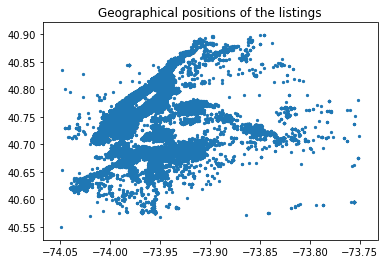

In [4]:
plt.scatter(data["longitude"], data["latitude"], s=5)
plt.title("Geographical positions of the listings");

In [5]:
data["created"] = pd.to_datetime(data["created"])
data["created_month"] = data["created"].dt.month
data["created_day"] = data["created"].dt.day
data["created_hour"] = data["created"].dt.hour
data["num_photos"] = data["photos"].apply(len)
data["num_features"] = data["features"].apply(len)
data["num_description_words"] = data["description"].apply(lambda x: len(x.split(" ")))

In [6]:
features  = ["bathrooms", "bedrooms", "price", "num_photos", "num_features", 
             "num_description_words", "created_month", "created_day", "created_hour"]

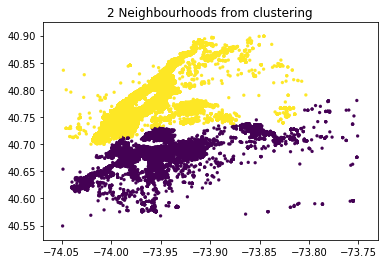

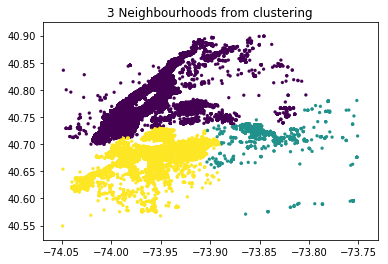

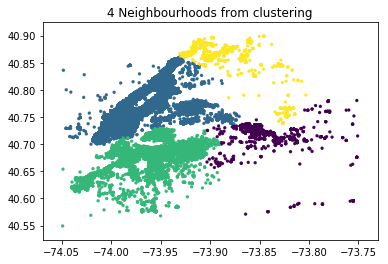

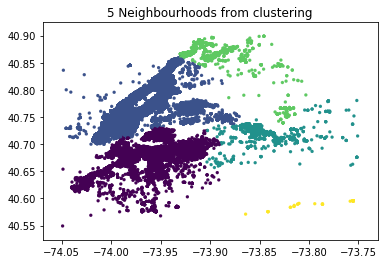

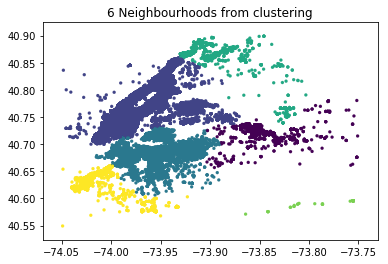

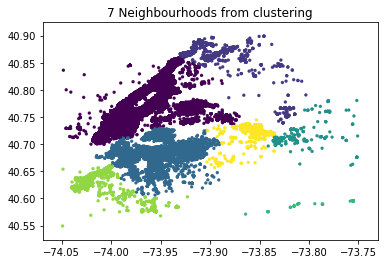

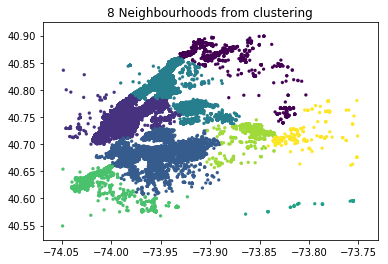

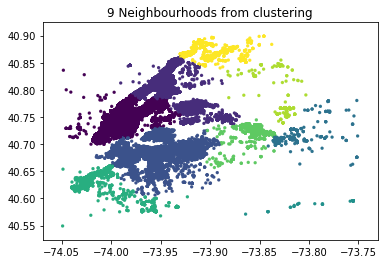

In [7]:
coords=data.as_matrix(columns=['latitude', "longitude"])
for n in range(2, 10):
    brc = Birch(branching_factor=100, n_clusters=n, threshold=0.01,compute_labels=True)
    brc.fit(coords)
    clusters=brc.predict(coords)    
    plt.scatter(data["longitude"], data["latitude"], c=clusters, s=10, linewidth=0.1)
    plt.title(str(n)+" Neighbourhoods from clustering")
    plt.show()

In [9]:
data.shape

(123751, 22)